In [1]:
import pandas as pd

In [2]:
import networkx as nx

In [3]:
user_party = pd.read_csv("user_party.csv")

In [4]:
G = nx.from_pandas_edgelist(user_party, source="user.id", target="Party", edge_attr=True)

In [5]:
#G.remove_node("Neutral")

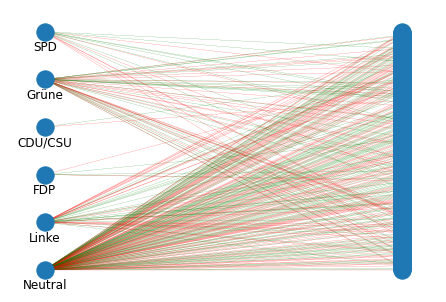

In [6]:
labels = {"FDP": "FDP", "CDU/CSU": "CDU/CSU", "Grüne":"Grüne", "Linke":"Linke", "SPD":"SPD", "Neutral":"Neutral"}
pos = nx.bipartite_layout(G, user_party.Party)
nx.draw(G, pos=pos, with_labels=False, width=0.15, edge_color=["red", "green"])
nx.draw_networkx_labels(G,{k:v+[0,-0.05] for k,v in pos.items()},labels,font_size=12,font_color='black')
None